# Importing libraries


In [39]:
import pandas as pd
import numpy as np # For mathematical calculations 
import seaborn as sns # For data visualization 
import matplotlib.pyplot as plt
import seaborn as sn # For plotting graphs
%matplotlib inline
import warnings # To ignore any warnings warnings.filterwarnings("ignore")

# Loading data

In [40]:
transaction_data=pd.read_csv("QVI_transaction_data.csv")

# Checking Outliers and Anomalies

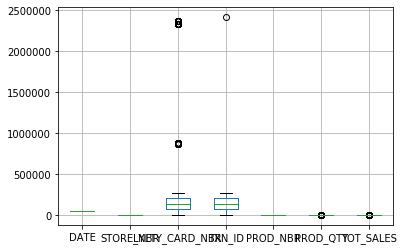

In [41]:
boxplot = transaction_data.boxplot(column=['DATE','STORE_NBR','LYLTY_CARD_NBR','TXN_ID','PROD_NBR','PROD_QTY','TOT_SALES'])

In [42]:
transaction_data = transaction_data[(transaction_data['LYLTY_CARD_NBR']< 500000) &   (transaction_data['TXN_ID']<500000)] 

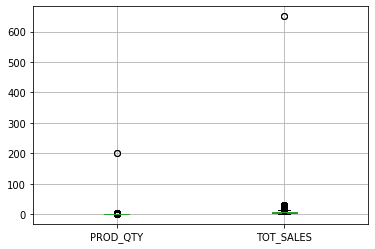

In [43]:
boxplot = transaction_data.boxplot(column=['PROD_QTY','TOT_SALES'])

In [44]:
transaction_data=transaction_data[(transaction_data['PROD_QTY']<50) & (transaction_data['TOT_SALES']<30)]

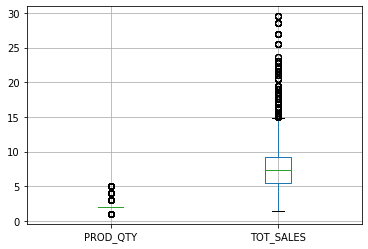

In [45]:
boxplot = transaction_data.boxplot(column=['PROD_QTY','TOT_SALES'])

In [46]:
transaction_data=transaction_data[transaction_data['TOT_SALES']<20]

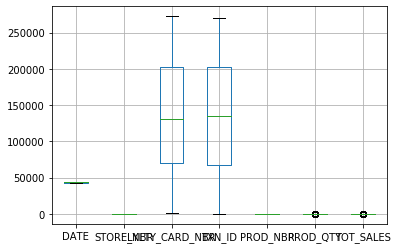

In [47]:
boxplot = transaction_data.boxplot(column=['DATE','STORE_NBR','LYLTY_CARD_NBR','TXN_ID','PROD_NBR','PROD_QTY','TOT_SALES'])

In [48]:
transaction_data.describe()
#All anomalies and outliers has been removed by checking with IQR,scatter plot and boxplot

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264563.000000,264563.000000,264563.000000,264563.000000,264563.000000,264563.000000,264563.000000
mean,43464.047168,135.078461,135249.486304,135135.407037,56.586843,1.903471,7.285337
std,105.355454,76.788645,76787.365988,78007.299510,32.825381,0.333623,2.481526
min,43282.000000,1.000000,1000.000000,1.000000,1.000000,1.000000,1.500000
25%,43373.000000,70.000000,70018.000000,67582.500000,28.000000,2.000000,5.400000
50%,43464.000000,130.000000,130351.000000,135121.000000,56.000000,2.000000,7.400000
75%,43555.000000,203.000000,203086.000000,202674.500000,85.000000,2.000000,9.200000
max,43646.000000,272.000000,272392.000000,270209.000000,114.000000,5.000000,19.500000


In [49]:
transaction_data.dtypes

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

In [50]:
transaction_data['PAC_SIZE']=transaction_data.PROD_NAME.str.extract('(\d+)')         #extracting sizes from prod_name

In [51]:
transaction_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PAC_SIZE
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150
...,...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150


In [52]:
updated_data=transaction_data
#Making a copy "updated_data " so that transaction_data will rremain as original data.
#"transaction_data" can be used for retrieving original data anytime.

# Extracting Product size from Product name

In [53]:
updated_data['PROD_NAME'] = updated_data['PROD_NAME'].str.replace('\d+', ' ') #removing sizes from prod_name

In [54]:
updated_data['PAC_SIZE'] = updated_data['PAC_SIZE'].astype(int)

# Loading and Merging Purchase Behaviour data

In [55]:
purchase_behaviour_data=pd.read_csv("QVI_purchase_behaviour.csv")

In [56]:
updated_data=updated_data.merge(purchase_behaviour_data,how='left') #merging both dataframes

In [57]:
updated_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PAC_SIZE,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt g,2,6.0,175,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese g,3,6.3,175,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken g,2,2.9,170,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion g,5,15.0,175,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili g,3,13.8,150,MIDAGE SINGLES/COUPLES,Budget


# Analysis

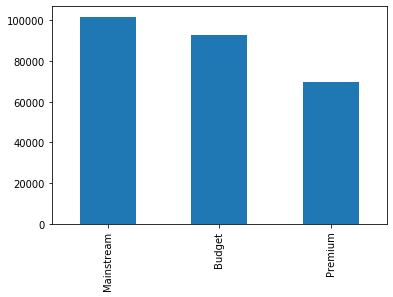

In [58]:
updated_data.PREMIUM_CUSTOMER.value_counts().plot(kind='bar')

Plotting a bar plot for count of each segment

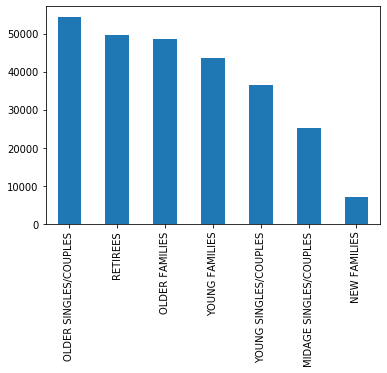

In [59]:
updated_data.LIFESTAGE.value_counts().plot(kind='bar')                  

# Plotting Pie chart (Proportion of sales by Premium Customer)

In [60]:
#calculating sales percentage contributed by mainstream customers
tot_main=updated_data.loc[updated_data['PREMIUM_CUSTOMER'] == 'Mainstream', 'TOT_SALES'].sum()
perc_main=(tot_main/updated_data['TOT_SALES'].sum())*100

In [61]:
#calculating sales percentage contributed by Budget customers
tot_budget=updated_data.loc[updated_data['PREMIUM_CUSTOMER'] == 'Budget', 'TOT_SALES'].sum()
perc_budget=(tot_budget/updated_data['TOT_SALES'].sum())*100

In [62]:
#calculating sales percentage contributed by Premium customers
tot_Prem=updated_data.loc[updated_data['PREMIUM_CUSTOMER'] == 'Premium', 'TOT_SALES'].sum()
perc_prem=(tot_Prem/updated_data['TOT_SALES'].sum())*100

In [63]:
perc_main,perc_budget,perc_prem

(38.84349137361891, 34.970399710910456, 26.18610891547062)

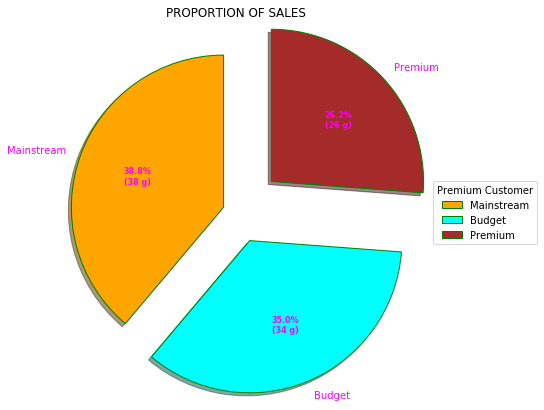

In [64]:
LABEL = ['Mainstream', 'Budget', 'Premium'] 
  
data = [perc_main,perc_budget,perc_prem] 
  

# Creating explode data 
explode = (0.1,  0.2, 0.3,) 
  
# Creating color parameters 
colors = ( "orange", "cyan", "brown") 
  
# Wedge properties 
wp = { 'linewidth' : 1, 'edgecolor' : "green" } 
  
# Creating autocpt arguments 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d} g)".format(pct, absolute) 
  
# Creating plot 
fig, ax = plt.subplots(figsize =(10, 7)) 
wedges, texts, autotexts = ax.pie(data,  
                                  autopct = lambda pct: func(pct, data), 
                                  explode = explode,  
                                  labels = LABEL, 
                                  shadow = True, 
                                  colors = colors, 
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="magenta")) 
  
# Adding legend 
ax.legend(wedges, LABEL, 
          title ="Premium Customer", 
          loc ="center left", 
          bbox_to_anchor =(1, 0, 0.5, 1)) 
  
plt.setp(autotexts, size = 8, weight ="bold") 
ax.set_title("PROPORTION OF SALES ") 
  
plt.show()

We can derive that Mainstream Customers are the ones who are contributing the most to the sales i.e they are contributing 38.84% to the sales.

# Plotting Pie chart (Proportion of sales by Lifestage)

In [65]:
values_for_piechart=[]                #creating empty list for storing values which will be used for plotting pie chart
unique_lifestage=updated_data.LIFESTAGE.unique()

In [66]:
#calculating percentage of sales by each lifestage
for i in range(len(unique_lifestage)):
    totold=updated_data.loc[updated_data['LIFESTAGE'] == unique_lifestage[i], 'TOT_SALES'].sum()
    perold=(totold/updated_data['TOT_SALES'].sum())*100
    values_for_piechart.append(perold)

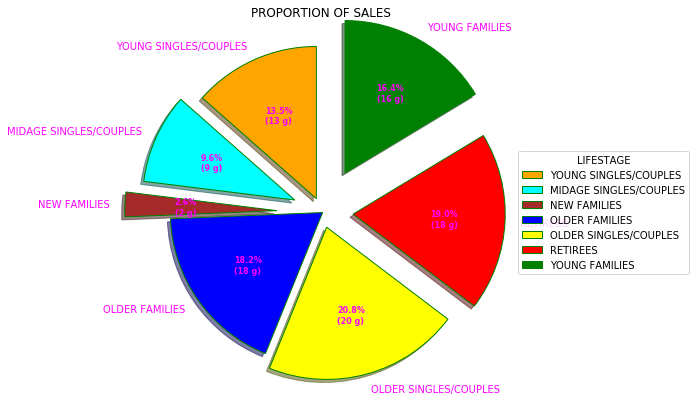

In [67]:
LABEL_PIE2 = unique_lifestage
  
data_PIE2 = values_for_piechart
  

# Creating explode data 
explode = (0.1,  0.2, 0.3,0.0,0.1,0.2,0.3) 
  
# Creating color parameters 
colors = ( "orange", "cyan", "brown","blue","yellow","red","green") 
  
# Wedge properties 
wp = { 'linewidth' : 1, 'edgecolor' : "green" } 
  
# Creating autocpt arguments 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d} g)".format(pct, absolute) 
  
# Creating plot 
fig, ax = plt.subplots(figsize =(10, 7)) 
wedges, texts, autotexts = ax.pie(data_PIE2,  
                                  autopct = lambda pct: func(pct, data_PIE2), 
                                  explode = explode,  
                                  labels = LABEL_PIE2, 
                                  shadow = True, 
                                  colors = colors, 
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="magenta")) 
  
# Adding legend 
ax.legend(wedges, LABEL_PIE2, 
          title ="LIFESTAGE", 
          loc ="center left", 
          bbox_to_anchor =(1, 0, 0.5, 1)) 
  
plt.setp(autotexts, size = 8, weight ="bold") 
ax.set_title("PROPORTION OF SALES ") 
  
plt.show()

 # Analysis by Each Available Segment

In [68]:
#Creating column "change " which stores customer's Lifestage and type of premium.
updated_data['change']=updated_data['LIFESTAGE']+updated_data["PREMIUM_CUSTOMER"]  

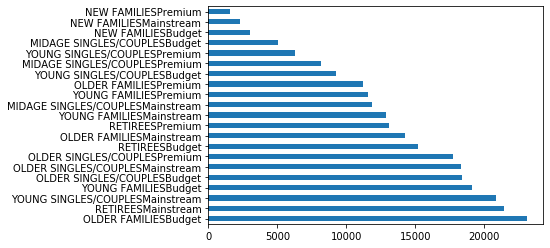

In [69]:
updated_data.change.value_counts().plot(kind='barh')   #Plotting Bar plot for count in each segment

In [70]:
unique_segments=updated_data.change.unique() #To get all unique Segments available in the column "change"
unique_segments 

array(['YOUNG SINGLES/COUPLESPremium', 'MIDAGE SINGLES/COUPLESBudget',
       'MIDAGE SINGLES/COUPLESMainstream',
       'MIDAGE SINGLES/COUPLESPremium', 'NEW FAMILIESBudget',
       'NEW FAMILIESMainstream', 'NEW FAMILIESPremium',
       'OLDER FAMILIESBudget', 'OLDER FAMILIESMainstream',
       'OLDER FAMILIESPremium', 'OLDER SINGLES/COUPLESBudget',
       'OLDER SINGLES/COUPLESMainstream', 'OLDER SINGLES/COUPLESPremium',
       'RETIREESBudget', 'RETIREESMainstream', 'RETIREESPremium',
       'YOUNG FAMILIESBudget', 'YOUNG FAMILIESMainstream',
       'YOUNG FAMILIESPremium', 'YOUNG SINGLES/COUPLESBudget',
       'YOUNG SINGLES/COUPLESMainstream'], dtype=object)

# Analysis by Percentage of sales by Each segment

In [71]:
#calculating percentage of sales by each segment
sales_prop_values=[]
for i in range(len(unique_segments)):
    totold=updated_data.loc[updated_data['change'] == unique_segments[i], 'TOT_SALES'].sum()
    perold=(totold/updated_data['TOT_SALES'].sum())*100
    sales_prop_values.append(perold)

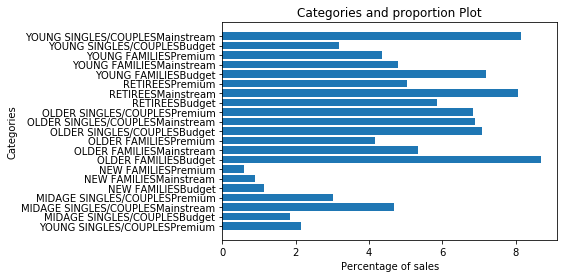

In [72]:
plt.barh(unique_segments,sales_prop_values)
plt.xlabel('Percentage of sales')
plt.ylabel("Categories")
plt.title('Categories and proportion Plot')
plt.show()

From this we can derive that OLDER FAMILIES-BUDGET Segment has the highest proportion in driving the sales.

# Analyis by Average Quantity in Each segment

In [73]:
updated_data['avg_qty']=updated_data['TOT_SALES']/updated_data['PROD_QTY'] #Adding column "avg_qty" to store average packets sold.

In [74]:
#calculation of Average quantity per segment
prop_by_avg=[]
for i in range(len(unique_segments)):
    totold=updated_data.loc[updated_data['change'] == unique_segments[i], 'TOT_SALES'].sum()
    hold_value=updated_data.loc[updated_data.change==unique_segments[i],'change'].count()
    prop_by_avg.append(totold/hold_value)

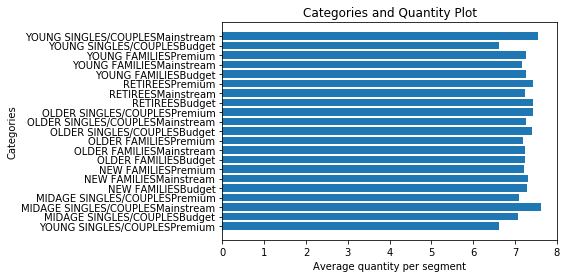

In [75]:
plt.barh(unique_segments,prop_by_avg)
plt.xlabel('Average quantity per segment')
plt.ylabel("Categories")
plt.title('Categories and Quantity Plot')
plt.show()

In [76]:
updated_data.to_csv(r"S:\Data science\export1.csv")

Mainstream midage and young singles and couples are more willing to pay more per packet of chips compared to their budget and premium counterparts. This may be due to premium shoppers being more likely to
buy healthy snacks and when they buy chips, this is mainly for entertainment purposes rather than their own
consumption. This is also supported by there being fewer premium midage and young singles and couples
buying chips compared to their mainstream counterparts.
